## Algerian Forest fire dataset

In [81]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
%matplotlib inline

In [152]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [153]:
# check null values
[df.isnull().sum()]


[day            0
 month          1
 year           1
 Temperature    1
  RH            1
  Ws            1
 Rain           1
 FFMC           1
 DMC            1
 DC             1
 ISI            1
 BUI            1
 FWI            1
 Classes        2
 dtype: int64]

In [154]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [155]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [87]:
df["Region"].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    1
243    1
244    1
245    1
Name: Region, Length: 246, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [89]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [90]:
df.drop([122, 167], inplace=True)
df.reset_index(drop=True, inplace=True)

In [91]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [92]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [93]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [94]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [95]:
df.drop([122],inplace=True)

In [96]:
df.reset_index(inplace=True)

In [97]:
df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']] = df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']].astype(int)

In [98]:
df[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI',]] = df[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI',]].astype(float)

In [102]:
df[['Region']]=df[['Region']].astype(int)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5    RH          243 non-null    int64  
 6    Ws          243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.5+ KB


In [133]:
df.to_csv('Algerian_forest_fires_cleanDataset.csv',index=False)

In [134]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,not fire


In [135]:
df_copy = df

In [137]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,not fire


In [139]:
df['Classes']

,Classes,Classes
0,not fire,not fire
1,not fire,not fire
2,not fire,not fire
3,not fire,not fire
4,not fire,not fire
...,...,...
238,fire,fire
239,not fire,not fire
240,not fire,not fire
241,not fire,not fire


In [123]:
df_copy.columns = df_copy.columns.str.replace(' ', '')


In [141]:
df_copy.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df_copy = df_copy.loc[:, ~df.columns.duplicated()]

In [146]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [145]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [147]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

/var/folders/4n/pgh_z2y11fb05s4v1wlnwcbh0000gn/T/ipykernel_5834/277479691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Classes'] = df_copy['Classes'].str.strip()


In [148]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [149]:
df_copy['Classes'] = df_copy['Classes'].replace({'not fire': 1, 'fire': 0})

/var/folders/4n/pgh_z2y11fb05s4v1wlnwcbh0000gn/T/ipykernel_5834/726863410.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Classes'] = df_copy['Classes'].replace({'not fire': 1, 'fire': 0})
/var/folders/4n/pgh_z2y11fb05s4v1wlnwcbh0000gn/T/ipykernel_5834/726863410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Classes'] = df_copy['Classes'].replace({'not fire': 1, 'fire': 0})


In [150]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [157]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [158]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,-0.719216,0.197102


<Axes: >

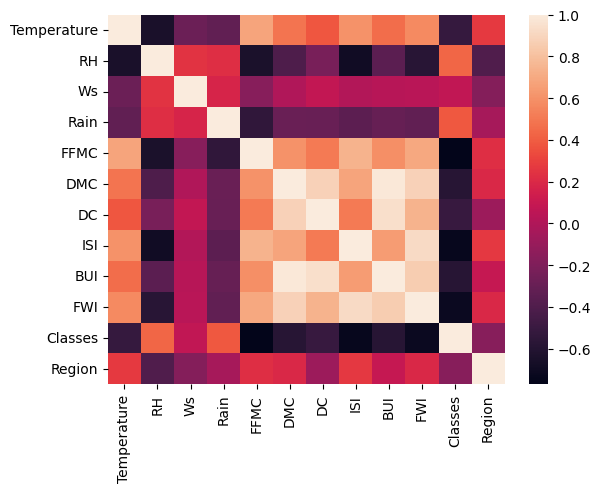

In [159]:
sns.heatmap(df_copy.corr())

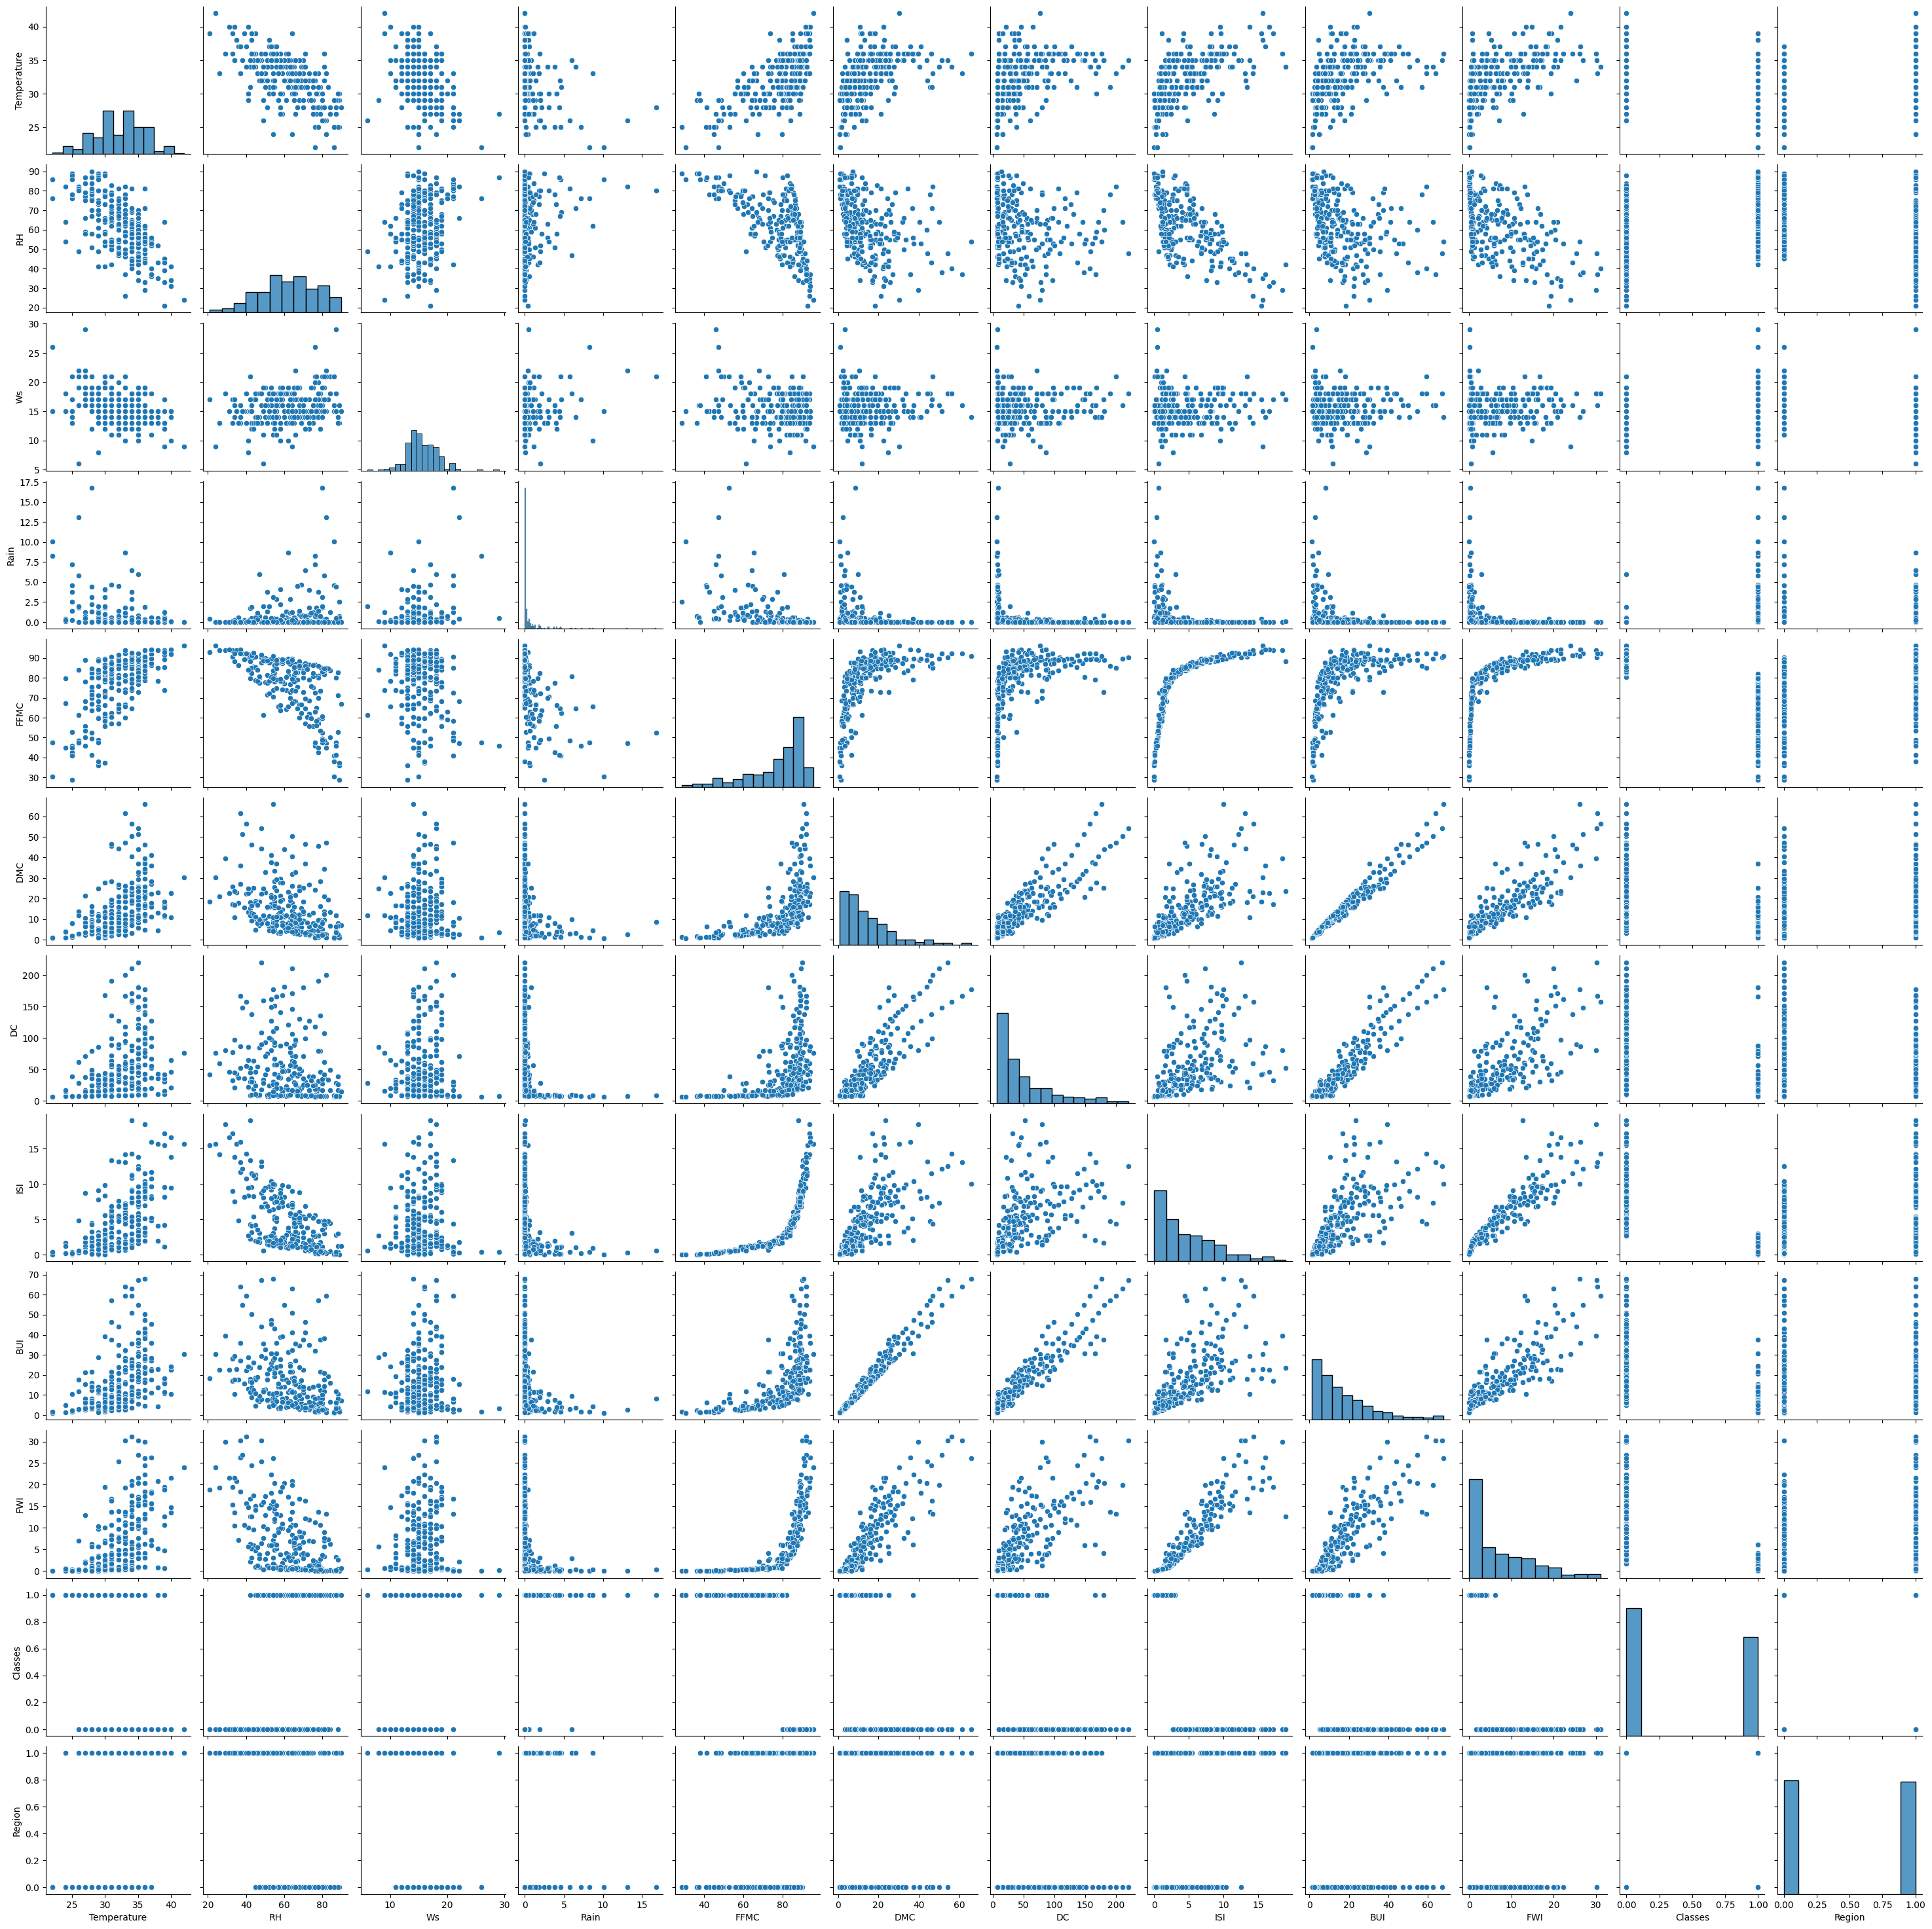

In [160]:
sns.pairplot(df_copy)

In [161]:
df_copy['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

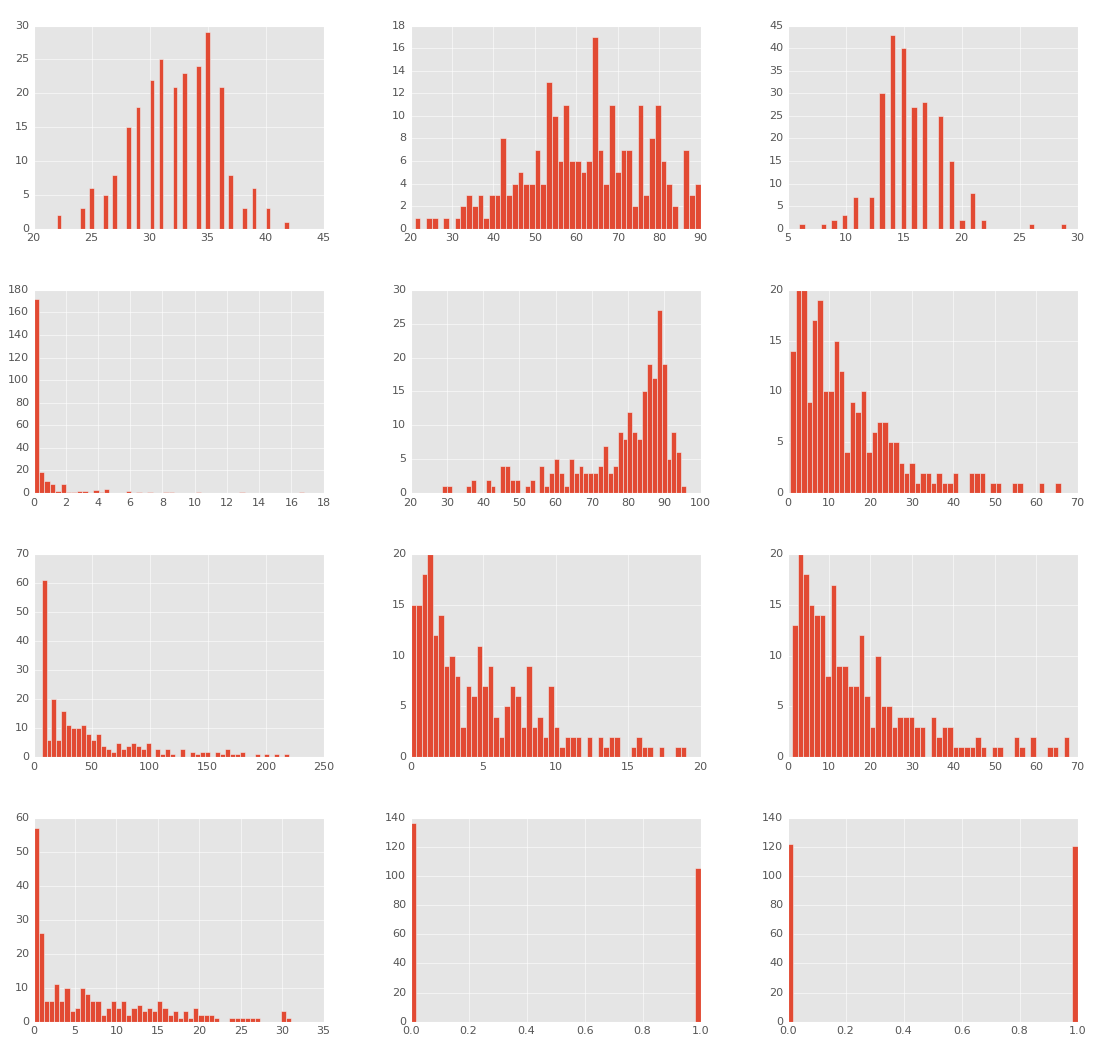

In [ ]:
# density plot for all features
plt.style.use('ggplot')
df_copy.hist(bins=50,figsize=(15,15))
plt.show()

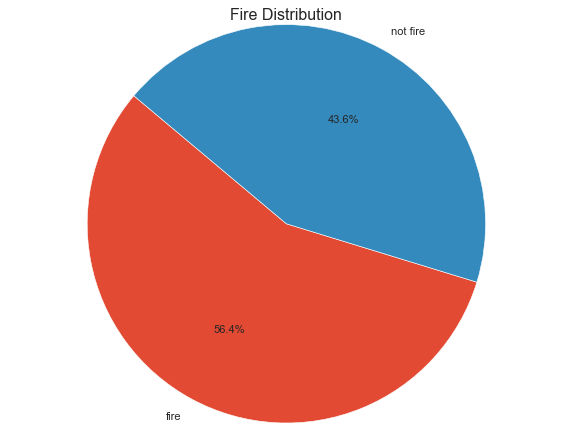

In [176]:
# Plot
plt.pie([137,106], labels=['fire', 'not fire'], autopct='%1.1f%%', startangle=140)
plt.title('Fire Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie a circle
plt.show()

### Model

In [177]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [179]:
# split the data
from sklearn.model_selection import train_test_split
X = df_copy.drop('FWI',axis=1)
y = df_copy['FWI']
print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)


Shape of x:  (243, 11)
Shape of y:  (243,)


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [182]:
# Standardization
scaler = StandardScaler()
X_train_l = scaler.fit_transform(X_train)
X_test_l = scaler.transform(X_test)

In [183]:
# model - Linear Regression
from sklearn.linear_model import LinearRegression
regression =  LinearRegression()
linear_regression = regression.fit(X_train_l,y_train)

In [194]:
# model - Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_l,y_train)

Ridge()

Text(0, 0.5, 'predicted output')

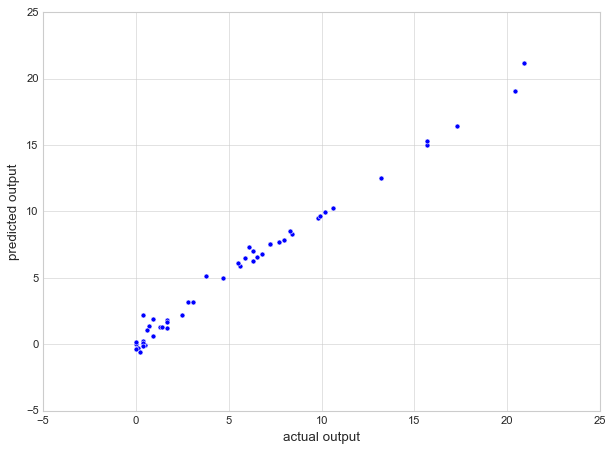

In [185]:
plt.scatter(y_test,linear_regression.predict(X_test_l))
plt.xlabel("actual output")
plt.ylabel("predicted output")


In [186]:
# Performance parameter
from sklearn.metrics import r2_score
r2score_linear = r2_score(y_test,linear_regression.predict(X_test_l))
r2score_linear

0.9890356825759857

Text(0, 0.5, 'predicted output')

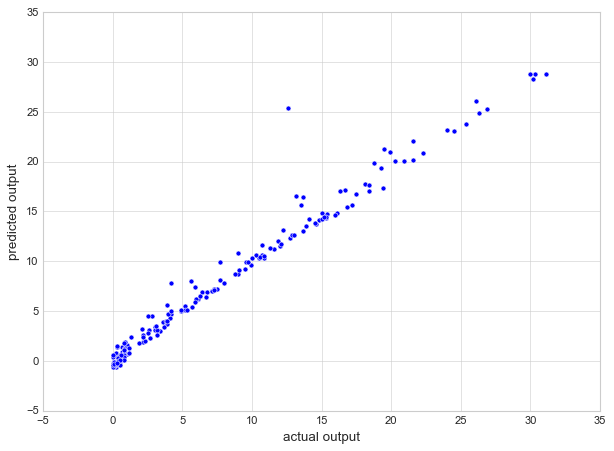

In [187]:
plt.scatter(y_train,linear_regression.predict(X_train_l))
plt.xlabel("actual output")
plt.ylabel("predicted output")

In [188]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_linear = mean_absolute_error(y_test,linear_regression.predict(X_test_l))
mean_absolute_error_linear

0.4267520614689846

Text(0, 0.5, 'predicted output')

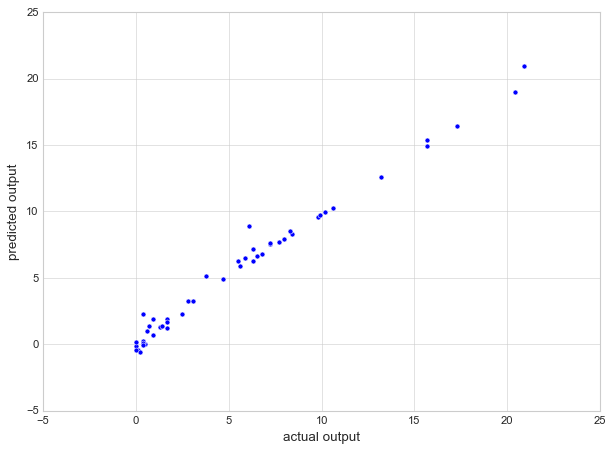

In [195]:
plt.scatter(y_test,ridge.predict(X_test_l))
plt.xlabel("actual output")
plt.ylabel("predicted output")


In [196]:
r2score_ridge = r2_score(y_test,ridge.predict(X_test_l))
r2score_ridge

0.9845121782477889